# Data Visualization

In [68]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 5]

In [69]:
app_reviews = pd.read_csv( "../cleaned_data/app_reviews.csv", delimiter = ',' )

app_reviews

,app_id,review_score,review_score_desc,total_positive,total_negative,total_reviews
0,10,9,Overwhelmingly Positive,19908,753,20661
1,20,8,Very Positive,1889,385,2274
2,30,8,Very Positive,1169,169,1338
3,40,8,Very Positive,548,131,679
4,50,9,Overwhelmingly Positive,4047,192,4239
...,...,...,...,...,...,...
49001,1450220,5,Mixed,11,6,17
49002,1450700,0,3 user reviews,3,0,3
49003,1452150,0,3 user reviews,3,0,3
49004,1454920,0,3 user reviews,3,0,3


In [70]:
percent_positive_reviews = []

for index, row in app_reviews.iterrows():
    pp = ( row["total_positive"] / row["total_reviews"] ) * 100
    percent_positive_reviews.append( int( pp ) )
    
app_reviews["percent_positive_reviews"] = percent_positive_reviews

app_reviews

,app_id,review_score,review_score_desc,total_positive,total_negative,total_reviews,percent_positive_reviews
0,10,9,Overwhelmingly Positive,19908,753,20661,96
1,20,8,Very Positive,1889,385,2274,83
2,30,8,Very Positive,1169,169,1338,87
3,40,8,Very Positive,548,131,679,80
4,50,9,Overwhelmingly Positive,4047,192,4239,95
...,...,...,...,...,...,...,...
49001,1450220,5,Mixed,11,6,17,64
49002,1450700,0,3 user reviews,3,0,3,100
49003,1452150,0,3 user reviews,3,0,3,100
49004,1454920,0,3 user reviews,3,0,3,100


## Distribution of Reviews

In [71]:
def num_games( x ):
    return len( x.index )

x = app_reviews.groupby( ["percent_positive_reviews"] )["app_id"].agg( [num_games] ).reset_index()

x

,percent_positive_reviews,num_games
0,0,3241
1,1,1
2,4,4
3,5,6
4,6,5
...,...,...
94,96,481
95,97,317
96,98,157
97,99,33


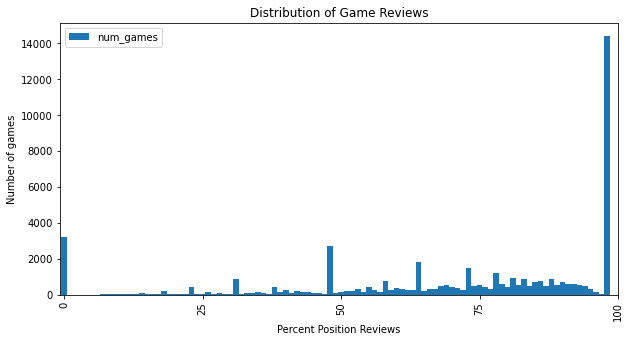

In [72]:
ax = x.plot.bar( x = "percent_positive_reviews", y = "num_games", width = 1, use_index = False, xticks = [0, 25, 50, 75, 100], title = "Distribution of Game Reviews" )

ax.set_ylabel("Number of games")
ax.set_xlabel("Percent Position Reviews")

plt.savefig('../plots/Reviews_distribution.png', dpi=300 )

## Reccurence of Genre

In [73]:
app_data = pd.read_csv( "../cleaned_data/app_data.csv", delimiter = ',')

app_data

,app_id,name,required_age,platforms,metacritic_score,category_ids,categories,genre_ids,genres,recommendations
0,10,Counter-Strike,0.0,windows:mac:linux,88.0,1:49:36:37:8,Multi-player:PvP:Online PvP:Shared/Split Scree...,1,Action,94916.0
1,20,Team Fortress Classic,0.0,windows:mac:linux,NaN,1:49:36:37:8:44,Multi-player:PvP:Online PvP:Shared/Split Scree...,1,Action,3597.0
2,30,Day of Defeat,0.0,windows:mac:linux,79.0,1:8,Multi-player:Valve Anti-Cheat enabled,1,Action,2669.0
3,40,Deathmatch Classic,0.0,windows:mac:linux,NaN,1:49:36:37:8:44,Multi-player:PvP:Online PvP:Shared/Split Scree...,1,Action,1244.0
4,50,Half-Life: Opposing Force,0.0,windows:mac:linux,NaN,2:1:8:44,Single-player:Multi-player:Valve Anti-Cheat en...,1,Action,7560.0
...,...,...,...,...,...,...,...,...,...,...
48066,1455060,TERMINUS,0.0,windows,NaN,2,Single-player,4:23,Casual:Indie,NaN
48067,1455090,Good puzzle: Castles,0.0,windows,NaN,2:22,Single-player:Steam Achievements,4:23:28,Casual:Indie:Simulation,NaN
48068,1455420,Choco Pixel S,0.0,windows,NaN,2:22:23,Single-player:Steam Achievements:Steam Cloud,4:23,Casual:Indie,NaN
48069,1455430,Harvest Green,0.0,windows,NaN,2,Single-player,25:4:23:3:28:2,Adventure:Casual:Indie:RPG:Simulation:Strategy,NaN


In [74]:
genres = dict()

for index, row in app_data.iterrows():
    
    if ( type( row["genres"] ) != str ):
        continue
    
    genre = row["genres"].split( ':' )
    for g in genre:
        if g not in genres:
            genres[g] = 0
        genres[g] += 1
        
temp = {}

temp["genres"] = []
temp["num_games"] = []

for row in genres:
    temp["genres"].append( row )
    temp["num_games"].append( genres[row] )

df = pd.DataFrame( temp )
df = df.sort_values( "num_games", axis = 0 ).reset_index()

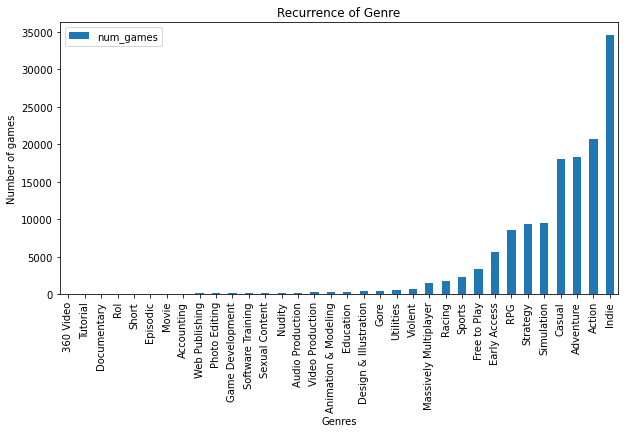

In [75]:
ax = df.plot.bar( x = "genres", y = "num_games", title = "Recurrence of Genre" )

ax.set_ylabel("Number of games")
ax.set_xlabel("Genres")

plt.savefig('../plots/Reccurence_genre.png', dpi=300, bbox_inches='tight')

## Recurrence of Tags

In [76]:
categories = dict()

for index, row in app_data.iterrows():
    
    if ( type( row["categories"] ) != str ):
        continue
    
    cat = row["categories"].split( ':' )
    for c in cat:
        if c not in categories:
            categories[c] = 0
        categories[c] += 1
        
temp = {}

temp["categories"] = []
temp["num_games"] = []

for row in categories:
    temp["categories"].append( row )
    temp["num_games"].append( categories[row] )

df = pd.DataFrame( temp )
df = df.sort_values( "num_games", axis = 0 ).reset_index()

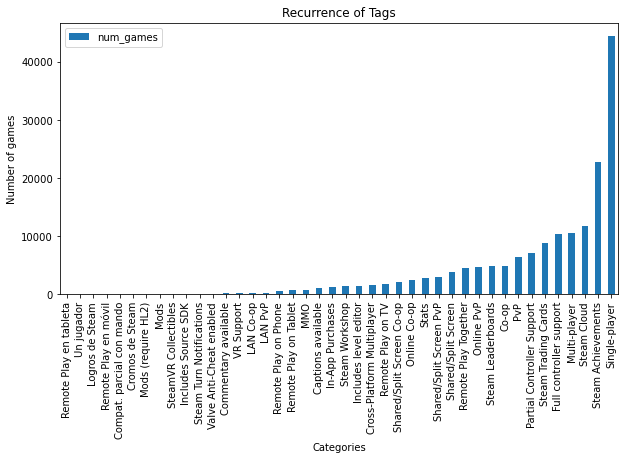

In [77]:
ax = df.plot.bar( x = "categories", y = "num_games", title = "Recurrence of Tags" )

ax.set_ylabel("Number of games")
ax.set_xlabel("Categories")

plt.savefig('../plots/Reccurence_tags.png', dpi=300, bbox_inches='tight')

## Total Hours played

In [78]:
user_data = pd.read_csv( "../cleaned_data/user_data.csv", delimiter = ',')

user_data

,app_id,num_users,total_hours
0,10,1000.0,19124629.0
1,20,1000.0,6349770.0
2,30,1000.0,7296999.0
3,40,679.0,1374408.0
4,50,1000.0,1406570.0
...,...,...,...
48980,1450220,17.0,0.0
48981,1450700,3.0,0.0
48982,1452150,3.0,0.0
48983,1454920,3.0,0.0


In [79]:
gg=user_data.sort_values(by='total_hours', ascending= False)[:20]
gg.reset_index()

,index,app_id,num_users,total_hours
0,23,570,1000.0,135022985.0
1,296,8500,1000.0,95389066.0
2,45908,1258320,1000.0,60614925.0
3,21309,582660,1000.0,60600862.0
4,31685,836620,1000.0,60600862.0
5,26504,706220,1000.0,60043944.0
6,10430,372000,1000.0,58892667.0
7,1239,39210,1000.0,52512238.0
8,11380,388080,1000.0,51812779.0
9,3549,230410,1000.0,50631044.0


In [80]:
gg['total_hours'].astype(int)

23       135022985
296       95389066
45908     60614925
21309     60600862
31685     60600862
26504     60043944
10430     58892667
1239      52512238
11380     51812779
3549      50631044
33118     48667394
10073     47311876
3751      46247194
301       46127748
20        44530022
11160     41986043
2312      41757059
6405      41262532
26245     40169661
23166     39221489
Name: total_hours, dtype: int32

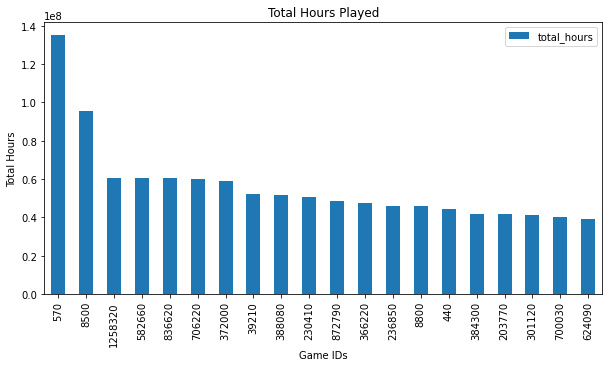

In [81]:
ax = gg.plot.bar( x = "app_id", y = "total_hours", title = "Total Hours Played" )

ax.set_ylabel("Total Hours")
ax.set_xlabel("Game IDs")

plt.savefig('../plots/total_hours.png', dpi=300, bbox_inches='tight')